In [2]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from my_imfilter import my_imfilter
from math import *
from skimage.color import rgb2gray
import cv2
import os
import sys
import numpy as np
from PIL import Image
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage.filters import convolve


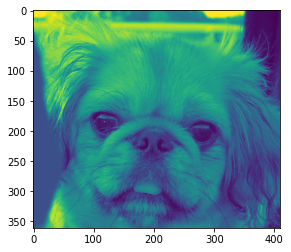

In [4]:
#step-1 finding the gradients

#the earlier code which I implemented in canny edge detector is being used. 


img= mpimg.imread('../data/dog.bmp').astype('float')/255.0

img1=rgb2gray(img) 
plt.imshow(img1)

soblex= np.array((-1, 0, 1 ,-2, 0, 2,  -1, 0, -1))
soblex= soblex.reshape(3,3)
sobley=np.array((1, 2, 1 ,0, 0, 0,  -1, -2, -1))
sobley=sobley.reshape(3,3)
gradx = ndimage.filters.convolve(img1, soblex)
grady= ndimage.filters.convolve(img1, sobley)




In [126]:
#now we will find the matrix m for each pixel. 
#nd use it to find the R values for each pixel.



In [5]:
Ix= gradx
Iy= grady
Ixx= Ix*Ix
Iyy= Iy * Iy
Ixy= Ix*Iy
#wind_size= (2*s+1 ) x 2*s+1

k=0.04 ##a parameter being set. 
s=3
m= img.shape[0]
n=img.shape[1]
r= np.zeros((m,n),float)
# we are assuming the weights are one. 
#that is we are using a rectangular weight matrix.
for i in range (s,m-s):
    for j in range(s, n-s):
        kxx = Ixx[i-s : i+s+1, j-s : j+s+1]
        kxy = Ixy[i-s : i+s+1, j-s : j+s+1]
        kyy = Iyy[i-s : i+s+1, j-s : j+s+1]

        Sxx=kxx.sum()
        Syy=kyy.sum()
        Sxy=kxy.sum()
        
        det= Sxx*Syy - (Sxy*Sxy)
        trace = Sxx + Syy
        r[i,j]=det - (k*(trace)*(trace))
        
print(r.max())

2941.888741899964


In [128]:
#Now we find the corner list and for this we use a threshold value. 
#which is ratio times of maximum value or minimum value in case handling negatives. 


In [6]:
ratio = 0.1

threshold=r.max()*ratio


print(threshold)
corners=[]
for i in range(m):
    for j in range(n):
        if r[i,j] > threshold:
            corners.append([ i, j, r[i,j]])


294.1888741899964


In [7]:
### now we will do non maximal suppression similar to what we did in canny edge detection algorithm.
# here we will chooose only one pixel out of many neighbours and suppress all the neighbours and make them non corner. 


sorted_list= sorted(corners, key=lambda x: x[2])

visited= np.zeros(img1.shape)
# 0 for not visited 
# 1 for being visited. 



In [10]:
def isvalid(a, b, dim):
    if(a<0 or a>=dim[0]):
        return 0
    if(b<0 or b>=dim[1]):
        return 0
    return 1

final_corners=[]
for i in range(len(sorted_list)):
    x= corners[i][0]
    y=corners[i][1]

    if(visited[x][y]==0):
        final_corners.append([x,y])
        # being marked visited
        visited[x][y]=1

        dx=[1,1,0,-1,-1,-1,0,1]
        dy=[0,1,1,1, 0, -1,-1,-1]
        # all the neighbours are being marked visited as only one of them is being used. 
        for k in range(8):
            for j in range(1,4):
                xcor=x+j*dx[k]
                ycor=y+j*dy[k]
                if(isvalid(xcor, ycor, img.shape)):
                    visited[xcor,ycor]=1

    else:
        continue


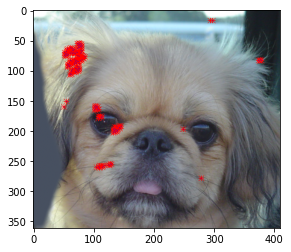

In [13]:
### now we will mark corners. 
corner_image= img.copy()
for i in range(len(final_corners)):
    x=final_corners[i][0]
    y=final_corners[i][1]
    corner_image[x,y]=[0,0,1]


    for k in range(8):
            for j in range(1,5):
                xcor= x+(j*dx[k])
                ycor= y+(j*dy[k])
                
                if(isvalid(xcor, ycor, img.shape)):
                    corner_image[xcor,ycor]=[1,0,0]
plt.imshow(corner_image)


[[6, 348], [8, 347], [9, 349], [11, 348], [58, 359], [67, 351], [69, 352], [81, 380], [88, 66], [88, 376], [99, 386], [117, 380], [117, 384], [118, 382], [118, 386], [124, 385], [124, 389], [125, 387], [126, 390], [128, 385], [128, 389], [130, 386], [130, 390], [173, 111], [174, 109], [174, 113], [175, 107], [176, 110], [177, 46], [177, 108], [177, 114], [178, 41], [178, 111], [179, 43], [179, 109], [180, 45], [180, 107], [180, 112], [181, 42], [181, 110], [181, 115], [181, 119], [182, 44], [182, 117], [182, 121], [183, 41], [184, 43], [184, 120], [185, 116], [186, 119], [192, 289], [193, 142], [193, 291], [194, 140], [194, 144], [195, 137], [195, 290], [196, 141], [197, 138], [201, 132], [319, 377], [320, 379], [321, 376], [321, 381], [322, 378], [323, 380], [324, 377], [325, 379], [345, 385], [6, 348], [8, 347], [9, 349], [11, 348], [58, 359], [67, 351], [69, 352], [81, 380], [88, 66], [88, 376], [99, 386], [117, 380], [117, 384], [118, 382], [118, 386], [124, 385], [124, 389], [125,